In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import StandardScalar
from sklearn.model_selection import GridSearchCV



ModuleNotFoundError: No module named 'sklearn'

In [2]:
# load the data and preprocess
data = pd.read_csv(
    'C:\\Users\\Joshua\\Downloads\\archive\\Combined_News_DJIA.csv')
data.drop('Date', axis=1, inplace=True)
#print(data.head())
# create an array for the labels
target = np.array(data['Label'].values)
print(target.shape)


(1989,)


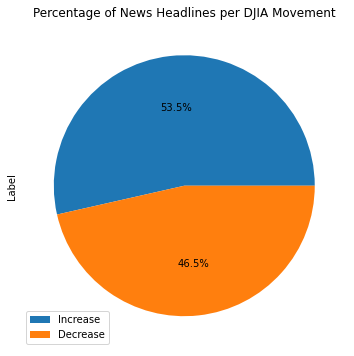

In [3]:
# create an array for the text
text = []
lemmatizer = WordNetLemmatizer()
for index, row in data.iterrows():
    # create an array for the headlines
    headlines = np.array(row[1:])

    # remove common garbage
    headlines = str(headlines).replace("__", "").replace("b\\", "").replace('b"', '').replace(
        "b'", "").replace('"', '').replace("'", "").replace('\\', '').replace("amp", "").replace("aa", "")

    # remove non alphabetic characters
    headlines = re.sub('[^A-Za-z]+', ' ', headlines)

    # lemmatize
    headlines = headlines.split()
    headlines = [lemmatizer.lemmatize(word) for word in headlines]
    headlines = ' '.join(headlines)

    #print(headlines)
    text.append(headlines)

# create new df
df = pd.DataFrame({'Label': target, 'Text': text})
df.head(20)
#df.tail(20)
df['Label'].value_counts().plot.pie(figsize=(6, 6),
                                    title="Percentage of News Headlines per DJIA Movement", labels=['', ''], autopct='%1.1f%%')
labels = ["Increase", "Decrease"]
plt.legend(labels, loc=3)
plt.gca().set_aspect('equal')


In [4]:
# Create bag of words
count = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bag_of_words = count.fit_transform(df['Text'])

# Create feature matrix
features = bag_of_words.toarray()

target = df['Label']
print(features)
print(features.shape)
print(target.shape)
#print(target)
count.get_feature_names_out()
#print(text[0])
#print('number of training samples: ' + str(len(data.index)))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]]
(1989, 408693)
(1989,)


array(['aa aa', 'aa aaa', 'aa india', ..., 'zweimal hitler', 'zygi naval',
       'zyklon deadly'], dtype=object)

In [5]:

# split data set
x = features
print(x)
y = target
print(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, shuffle=True, test_size=0.33,
                                                    random_state=1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]]
0       0
1       1
2       0
3       0
4       1
       ..
1984    0
1985    1
1986    1
1987    1
1988    1
Name: Label, Length: 1989, dtype: int64


In [ ]:
# scale data
standard_scalar = StandardScalar().fit(x_train)
x_train_scaled = standard_scalar.transform(x_train)
x_test_scaled = standard_scalar.transform(x_test)

In [6]:

#mlp = MLPClassifier(solver='sgd', activation='logistic', random_state=1).fit(x_train, y_train)
params = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'max_iter': [50, 100, 200],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.001, 0.01, 0.05],
    'learning_rate': ['invscaling', 'constant', 'adaptive']
}
mlp = GridSearchCV(MLPClassifier(), params, n_jobs=-1, verbose=4)
mlp.fit(x_train_scaled, y_train)
print(mlp.best_params_)


y_pred = mlp.predict(x_test)
print(mlp.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


c:\Users\Joshua\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5357686453576864
0.5357686453576864
[[  0 305]
 [  0 352]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       305
           1       0.54      1.00      0.70       352

    accuracy                           0.54       657
   macro avg       0.27      0.50      0.35       657
weighted avg       0.29      0.54      0.37       657



c:\Users\Joshua\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Joshua\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Joshua\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
